In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Random-Walk-ALG again with probability p
def random_walk(graph, start_node, steps, p):
    path = [start_node]
    current_node = start_node
    for _ in range(steps):
        if random.random() > p:  # Probability check
            break
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        path.append(next_node)
        current_node = next_node
   
    return path

# MakeBenign with Random-Walk ALG and probability p
def MakeBenign(G0, l, Δ, steps, p):
    V = list(G0.nodes())

    # Add missing edges to increase degree
    for v in V:
        while len([e for e in G0.edges(v)]) < l:
            other_node = random.choice(V)
            if v != other_node and not G0.has_edge(v, other_node):
                G0.add_edge(v, other_node)

    # Add edges using a Random-Walk to regulate cyclic structure
    for v in V:
        path = random_walk(G0, v, steps, p)
        for i in range(len(path) - 1):
            if not G0.has_edge(path[i], path[i + 1]):
                G0.add_edge(path[i], path[i + 1])

    # Add an edge between two adjacent nodes to regulate cyclic structure using random walk
    for v in V:
        neighbors = list(G0.neighbors(v))
        if neighbors:
            walk_path = random_walk(G0, v, steps, p)
            neighbor = walk_path[-1]
            if neighbor in neighbors:
                G0.add_edge(v, neighbor)

    # Add additional random edges to regulate connectivity with probability p
    for _ in range(Δ):
        if random.random() < p:
            node1, node2 = random.sample(V, 2)
            if not G0.has_edge(node1, node2):
                G0.add_edge(node1, node2)

    return G0


def CreateExpander(G0, l, Δ, Λ, steps, p):
    V = list(G0.nodes())

    def create_tokens(v):
        return [v] * max((Δ // 8), 5)

    E = []  # Initialize E outside the loop

    for i in range(Λ):
        G0 = MakeBenign(G0, l, Δ, steps, p)  # Update the graph using MakeBenign method

        for v in V:
            T = []  # Buffer to store received tokens
            tokens = create_tokens(v)
            T.extend(tokens)
            
            for j in range(1, l + 1):
                new_tokens = []
                for token in T:
                    random_walk_path = random_walk(G0, v, steps, p)  # Corrected: pass p
                    if len(random_walk_path) > 1:
                        new_tokens.append(random_walk_path[-1])

                T = new_tokens

            selected_tokens = random.sample(T, min(max(Δ , 3 * Δ // 8), len(T)))
            E_i = [(v, w) for w in selected_tokens]

            E.extend(E_i)

            while len([e for e in E if v in e]) < Δ:
                E.append((v, v))

    return (V, E)



p=0.1: Connected=False
p=0.2: Connected=False
p=0.3: Connected=False
p=0.4: Connected=False
p=0.5: Connected=False
p=0.6: Connected=False
p=0.7: Connected=False
p=0.8: Connected=True
p=0.9: Connected=True


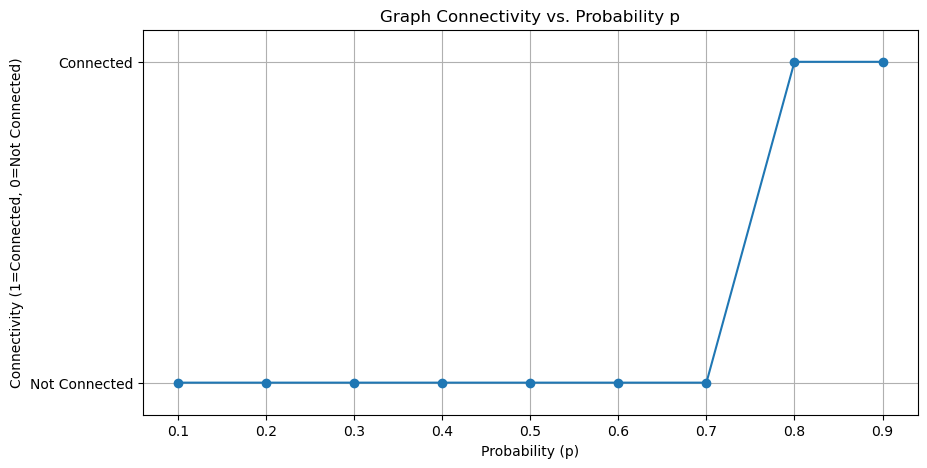

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Assuming the CreateExpander function is defined as previously

def is_connected(graph):
    return nx.is_connected(graph)

def check_connectivity(n, l, Δ, Λ, steps, p_values):
    connectivity_results = []
    
    for p in p_values:
        initial_graph = nx.erdos_renyi_graph(n, 0.3)  # Create initial graph
        V, E = CreateExpander(initial_graph, l, Δ, Λ, steps, p)
        G = nx.Graph()
        G.add_nodes_from(V)
        G.add_edges_from(E)
        connected = is_connected(G)
        connectivity_results.append((p, connected))
        print(f'p={p}: Connected={connected}')

    # Plotting the results
    plt.figure(figsize=(10, 5))
    p_vals, conn_status = zip(*connectivity_results)
    plt.plot(p_vals, conn_status, marker='o', linestyle='-')
    plt.xlabel('Probability (p)')
    plt.ylabel('Connectivity (1=Connected, 0=Not Connected)')
    plt.title('Graph Connectivity vs. Probability p')
    plt.grid(True)
    plt.ylim(-0.1, 1.1)
    plt.yticks([0, 1], ['Not Connected', 'Connected'])
    plt.show()

